In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df = pd.read_csv("data/superstore_sales_dataset.csv")

In [131]:
display(df.head())
display(df.info())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

None

In [132]:
# Filling null values
df.fillna({"Postal Code" : 0},  inplace = True)
df ["Postal Code"] = df["Postal Code"].astype(int)

In [133]:
df.duplicated().sum()

np.int64(0)

In [134]:
# Types of customers
types_of_customers = df["Segment"].unique()

print (types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [135]:
number_of_customers = df["Segment"].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={"Segment" : "Type Of Customer"})

print (number_of_customers)

  Type Of Customer  count
0         Consumer   5101
1        Corporate   2953
2      Home Office   1746


([<matplotlib.patches.Wedge at 0x1bf475e3ad0>,
 [Text(-0.07082912490696024, 1.0977172837597642, 'Consumer'),
  Text(-0.5228074564626142, -0.9678183525161589, 'Corporate'),
  Text(0.9321462195039758, -0.5840406025820858, 'Home Office')],
 [Text(-0.03863406813106921, 0.5987548820507803, '52.1%'),
  Text(-0.28516770352506227, -0.5279009195542684, '30.1%'),
  Text(0.508443392456714, -0.3185676014084104, '17.8%')])

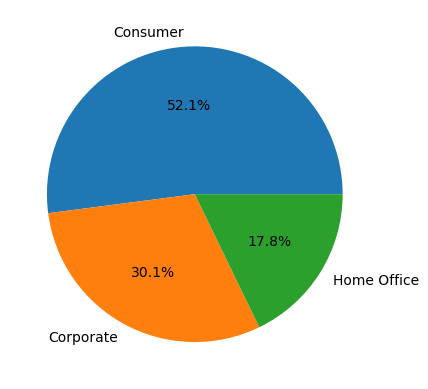

In [136]:
plt.pie(number_of_customers["count"], labels=number_of_customers["Type Of Customer"], autopct="%1.1f%%")

  Type Of Customer   Total Sales
0         Consumer  1.148061e+06
1        Corporate  6.884941e+05
2      Home Office  4.249822e+05


<BarContainer object of 3 artists>

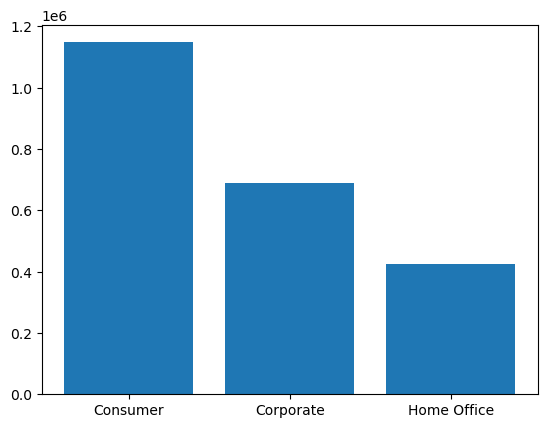

In [137]:
# Sales per segment
sales_per_segment = df.groupby("Segment")["Sales"].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={"Segment":"Type Of Customer", "Sales":"Total Sales"})

print(sales_per_segment)

plt.bar(sales_per_segment["Type Of Customer"], sales_per_segment["Total Sales"])

([<matplotlib.patches.Wedge at 0x1bf47375b10>,
 [Text(-0.026420901678353936, 1.099682652384088, 'Consumer'),
  Text(-0.5902004249314666, -0.9282582929393717, 'Corporate'),
  Text(0.9138143750681164, -0.6123261287246105, 'Home Office')],
 [Text(-0.01441140091546578, 0.5998269013004115, '50.8%'),
  Text(-0.32192750450807267, -0.5063227052396572, '30.4%'),
  Text(0.49844420458260885, -0.3339960702134238, '18.8%')])

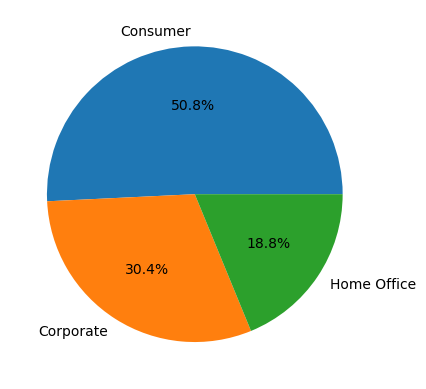

In [138]:
plt.pie(sales_per_segment["Total Sales"], labels=sales_per_segment["Type Of Customer"], autopct="%1.1f%%")

In [139]:
# Order frequency per customer
customers_order_frequency = df.groupby(["Customer ID", "Customer Name", "Segment"])["Order ID"].count().reset_index()
customers_order_frequency.rename(columns={"Order ID":"Total Orders"}, inplace = True)

# Loyal customers by order frequency
repeat_customers = customers_order_frequency[customers_order_frequency["Total Orders"] >= 1]
repeat_customers_sorted = repeat_customers.sort_values(by="Total Orders", ascending = False)

print(repeat_customers_sorted.head(12).reset_index(drop=True))

   Customer ID        Customer Name      Segment  Total Orders
0     WB-21850        William Brown     Consumer            35
1     PP-18955           Paul Prost  Home Office            34
2     MA-17560         Matt Abelman  Home Office            34
3     JL-15835             John Lee     Consumer            33
4     SV-20365          Seth Vernon     Consumer            32
5     JD-15895     Jonathan Doherty    Corporate            32
6     CK-12205  Chloris Kastensmidt     Consumer            32
7     AP-10915       Arthur Prichep     Consumer            31
8     ZC-21910     Zuschuss Carroll     Consumer            31
9     EP-13915           Emily Phan     Consumer            31
10    LC-16870        Lena Cacioppo     Consumer            30
11    BM-11650           Brian Moss    Corporate            29


In [140]:
# Actual sales per customer
customer_sales = df.groupby(["Customer ID", "Customer Name", "Segment"])["Sales"].sum().reset_index()
top_spenders = customer_sales.sort_values(by="Sales", ascending=False)

print(top_spenders.head(12).reset_index(drop=True))

   Customer ID       Customer Name      Segment      Sales
0     SM-20320         Sean Miller  Home Office  25043.050
1     TC-20980        Tamara Chand    Corporate  19052.218
2     RB-19360        Raymond Buch     Consumer  15117.339
3     TA-21385        Tom Ashbrook  Home Office  14595.620
4     AB-10105       Adrian Barton     Consumer  14473.571
5     KL-16645        Ken Lonsdale     Consumer  14175.229
6     SC-20095        Sanjit Chand     Consumer  14142.334
7     HL-15040        Hunter Lopez     Consumer  12873.298
8     SE-20110        Sanjit Engle     Consumer  12209.438
9     CC-12370  Christopher Conant     Consumer  12129.072
10    TS-21370        Todd Sumrall    Corporate  11891.751
11    GT-14710           Greg Tran     Consumer  11820.120


In [141]:
# Shipping mode frequency
shipping_mode = df["Ship Mode"].value_counts().reset_index()
shipping_mode = shipping_mode.rename(columns={"index":"Use Frequency", "Ship Mode":"Mode Of Shipment", "count":"Use Frequency"})

print(shipping_mode)

  Mode Of Shipment  Use Frequency
0   Standard Class           5859
1     Second Class           1902
2      First Class           1501
3         Same Day            538


([<matplotlib.patches.Wedge at 0x1bf479b9410>,
 [Text(-0.33286822443706726, 1.0484267953272248, 'Standard Class'),
  Text(-0.37327504859675137, -1.034729789894489, 'Second Class'),
  Text(0.7455147818297655, -0.8088310763523601, 'First Class'),
  Text(1.083680824088883, -0.18877465799741078, 'Same Day')],
 [Text(-0.18156448605658213, 0.5718691610875771, '59.8%'),
  Text(-0.20360457196186435, -0.5643980672151757, '19.4%'),
  Text(0.4066444264525993, -0.44118058710128727, '15.3%'),
  Text(0.5910986313212089, -0.10296799527131496, '5.5%')])

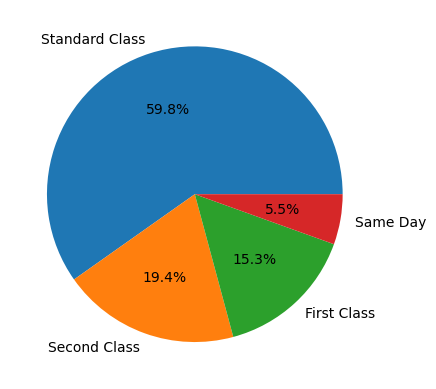

In [142]:
plt.pie(shipping_mode["Use Frequency"], labels=shipping_mode["Mode Of Shipment"], autopct="%1.1f%%")

In [143]:
# Number of customers per state
state = df["State"].value_counts().reset_index()
state = state.rename(columns={"index":"State", "State":"Number Of Customers"})

print(state.head(20))

   Number Of Customers  count
0           California   1946
1             New York   1097
2                Texas    973
3         Pennsylvania    582
4           Washington    504
5             Illinois    483
6                 Ohio    454
7              Florida    373
8             Michigan    253
9       North Carolina    247
10            Virginia    224
11             Arizona    223
12           Tennessee    183
13            Colorado    179
14             Georgia    177
15            Kentucky    137
16             Indiana    135
17       Massachusetts    135
18              Oregon    122
19          New Jersey    122


In [144]:
# Number of customers per city
city = df["City"].value_counts().reset_index()

print(city.head(25))

             City  count
0   New York City    891
1     Los Angeles    728
2    Philadelphia    532
3   San Francisco    500
4         Seattle    426
5         Houston    374
6         Chicago    308
7        Columbus    221
8       San Diego    170
9     Springfield    161
10         Dallas    156
11   Jacksonville    125
12        Detroit    115
13         Newark     92
14        Jackson     82
15       Columbia     81
16       Richmond     81
17         Aurora     68
18        Phoenix     63
19      Arlington     60
20    San Antonio     59
21          Miami     56
22     Louisville     54
23      Rochester     53
24     Long Beach     52


In [145]:
# Actual sales per state
state_sales = df.groupby(["State"])["Sales"].sum().reset_index()
top_sales = state_sales.sort_values(by="Sales", ascending=False)

print(top_sales.head(10).reset_index(drop=True))

          State        Sales
0    California  446306.4635
1      New York  306361.1470
2         Texas  168572.5322
3    Washington  135206.8500
4  Pennsylvania  116276.6500
5       Florida   88436.5320
6      Illinois   79236.5170
7      Michigan   76136.0740
8          Ohio   75130.3500
9      Virginia   70636.7200


In [146]:
# Actual sales per city
city_sales = df.groupby(["City"])["Sales"].sum().reset_index()
top_city_sales = city_sales.sort_values (by="Sales", ascending=False)

print(top_city_sales.head(10).reset_index(drop=True))

            City        Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


In [147]:
# Sales per state and city
state_city_sales = df.groupby(["State", "City"])["Sales"].sum().reset_index()

print(state_city_sales.head(20))

      State           City      Sales
0   Alabama         Auburn   1766.830
1   Alabama        Decatur   3374.820
2   Alabama       Florence   1997.350
3   Alabama         Hoover    525.850
4   Alabama     Huntsville   2484.370
5   Alabama         Mobile   5462.990
6   Alabama     Montgomery   3722.730
7   Alabama     Tuscaloosa    175.700
8   Arizona       Avondale    946.808
9   Arizona  Bullhead City     22.288
10  Arizona       Chandler   1067.403
11  Arizona        Gilbert   4172.382
12  Arizona       Glendale   2917.865
13  Arizona           Mesa   4037.740
14  Arizona         Peoria   1341.352
15  Arizona        Phoenix  11000.257
16  Arizona     Scottsdale   1466.307
17  Arizona   Sierra Vista     76.072
18  Arizona          Tempe   1070.302
19  Arizona         Tucson   6313.016


In [148]:
df.head(100)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,US-2018-109484,06/11/2018,12/11/2018,Standard Class,RB-19705,Roger Barcio,Home Office,United States,Portland,Oregon,97206,West,OFF-BI-10004738,Office Supplies,Binders,Flexible Leather- Look Classic Collection Ring...,5.6820
96,97,CA-2018-161018,09/11/2018,11/11/2018,Second Class,PN-18775,Parhena Norris,Home Office,United States,New York City,New York,10009,East,FUR-FU-10000629,Furniture,Furnishings,9-3/4 Diameter Round Wall Clock,96.5300
97,98,CA-2018-157833,17/06/2018,20/06/2018,First Class,KD-16345,Katherine Ducich,Consumer,United States,San Francisco,California,94122,West,OFF-BI-10001721,Office Supplies,Binders,Trimflex Flexible Post Binders,51.3120
98,99,CA-2017-149223,06/09/2017,11/09/2017,Standard Class,ER-13855,Elpida Rittenbach,Corporate,United States,Saint Paul,Minnesota,55106,Central,OFF-AP-10000358,Office Supplies,Appliances,Fellowes Basic Home/Office Series Surge Protec...,77.8800


In [149]:
# Products category and subcategory
subcategory_count = df.groupby("Category")["Sub-Category"].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by="Sub-Category", ascending = False)
print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [150]:
# Actual sales per subcategory
subcategory_count_sales = df.groupby(["Category", "Sub-Category"])["Sales"].sum().reset_index()
subcategory_count_sales = subcategory_count_sales.sort_values(by="Sales", ascending = False)

print(subcategory_count_sales.reset_index(drop=True))

           Category Sub-Category        Sales
0        Technology       Phones  327782.4480
1         Furniture       Chairs  322822.7310
2   Office Supplies      Storage  219343.3920
3         Furniture       Tables  202810.6280
4   Office Supplies      Binders  200028.7850
5        Technology     Machines  189238.6310
6        Technology  Accessories  164186.7000
7        Technology      Copiers  146248.0940
8         Furniture    Bookcases  113813.1987
9   Office Supplies   Appliances  104618.4030
10        Furniture  Furnishings   89212.0180
11  Office Supplies        Paper   76828.3040
12  Office Supplies     Supplies   46420.3080
13  Office Supplies          Art   26705.4100
14  Office Supplies    Envelopes   16128.0460
15  Office Supplies       Labels   12347.7260
16  Office Supplies    Fasteners    3001.9600


In [151]:
# Actual sasles per category
product_category = df.groupby(["Category"])["Sales"].sum().reset_index()
top_product_category = product_category.sort_values(by="Sales", ascending = False)

print(top_product_category.reset_index(drop=True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


([<matplotlib.patches.Wedge at 0x1bf47560b90>,
 [Text(0.44988564266575465, 1.0037942560720405, 'Technology'),
  Text(-1.0842320951134052, -0.18558222955335987, 'Furniture'),
  Text(0.6127885417845869, -0.9135043530588783, 'Office Supplies')],
 [Text(0.24539216872677524, 0.5475241396756584, '36.6%'),
  Text(-0.5913993246073119, -0.101226670665469, '32.2%'),
  Text(0.33424829551886553, -0.49827510166847905, '31.2%')])

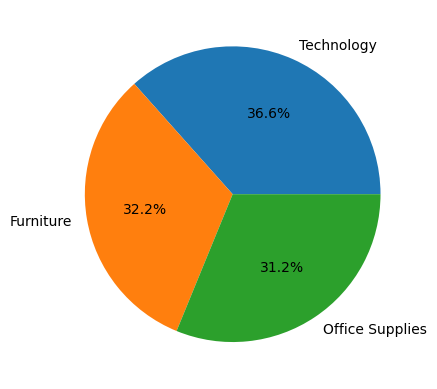

In [152]:
plt.pie(top_product_category["Sales"], labels=top_product_category["Category"], autopct="%1.1f%%")

<BarContainer object of 17 artists>

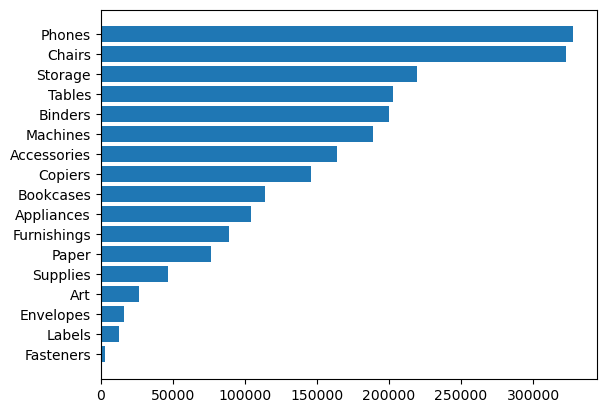

In [153]:
subcategory_count_sales = subcategory_count_sales.sort_values(by="Sales", ascending = True)
plt.barh(subcategory_count_sales["Sub-Category"], subcategory_count_sales["Sales"])

In [154]:
# Actual sales per year
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst = True)
yearly_sales = df.groupby(df["Order Date"].dt.year)["Sales"].sum()
yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={"Order Date":"Year", "Sales":"Total Sales"})

print (yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


<BarContainer object of 4 artists>

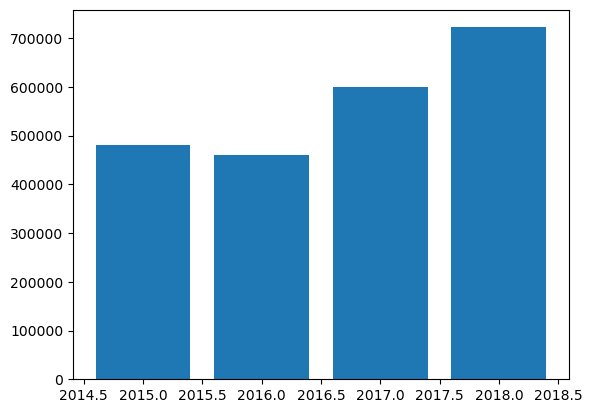

In [155]:
plt.bar(yearly_sales["Year"], yearly_sales["Total Sales"])

In [156]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,2015-06-09,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,2015-06-09,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,2015-06-09,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,2015-06-09,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,2015-06-09,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


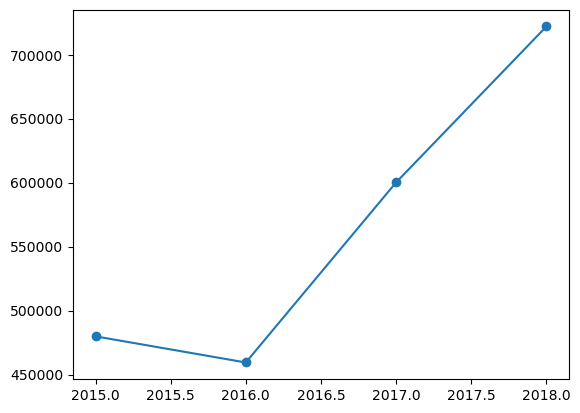

In [157]:
plt.plot(yearly_sales["Year"], yearly_sales["Total Sales"], marker="o", linestyle="-")

In [158]:
# Quarterly look at the most profitable year (2018)
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)
year_sales = df[df["Order Date"].dt.year == 2018]
quarterly_sales = year_sales.resample("QE", on="Order Date")["Sales"].sum()
quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns = {"Order Date": "Quarter", "Sales" : "Total Sales"})

print(quarterly_sales)

     Quarter  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


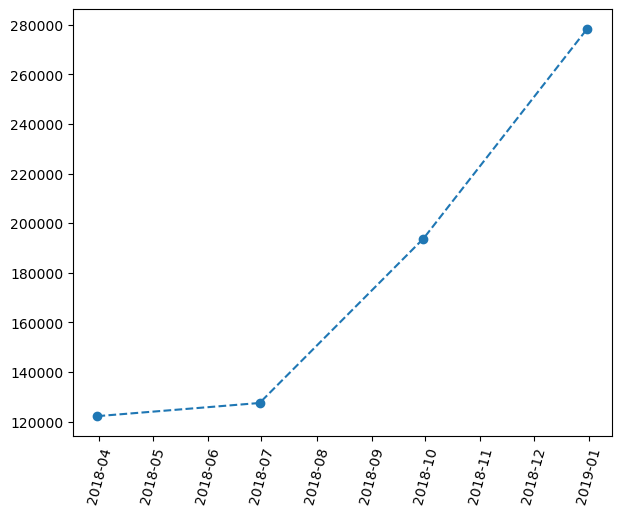

In [159]:
plt.plot(quarterly_sales["Quarter"], quarterly_sales["Total Sales"], marker = "o", linestyle = "--")

plt.tight_layout()
plt.xticks(rotation=75)
plt.show()

In [160]:
# Monthly look at the most profitable year (2018)
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst = True)
yearly_sales = df[df["Order Date"].dt.year == 2018]
monthly_sales = yearly_sales.resample("ME", on = "Order Date")["Sales"].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={"Order Date":"Month", "Sales":"Total Monthly Sales"})

print (monthly_sales)

        Month  Total Monthly Sales
0  2018-01-31           43476.4740
1  2018-02-28           19920.9974
2  2018-03-31           58863.4128
3  2018-04-30           35541.9101
4  2018-05-31           43825.9822
5  2018-06-30           48190.7277
6  2018-07-31           44825.1040
7  2018-08-31           62837.8480
8  2018-09-30           86152.8880
9  2018-10-31           77448.1312
10 2018-11-30          117938.1550
11 2018-12-31           83030.3888


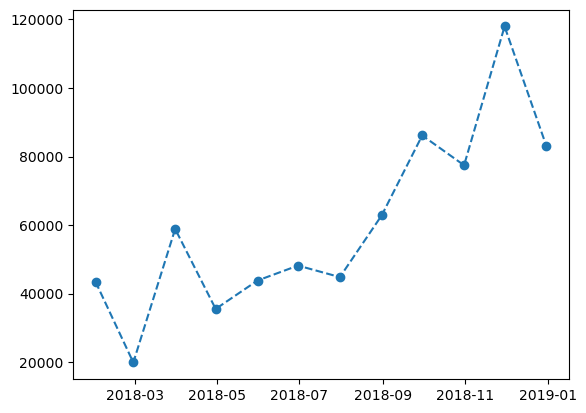

In [161]:
plt.plot(monthly_sales["Month"], monthly_sales["Total Monthly Sales"], marker = "o", linestyle = "--")